### 1. Aprendizaje Automático

##### 1.1. Preprocesamiento de datos

##### 1.1.1. 
A la hora de preparar los datos antes de ser entrenados existen tres acciones básicas a realizar, explique en que consiste cada una de las siguientes y como se implementarían en Python: Mean subtraction, Normalization, Scaling.

Aplicar estas tres funciones sobre un dataset a elegir de scikit-learn

#### a) Mean Substraction o Mean Removal 
#### [Teoría]: 
 
La intención de quitar la media al momento de preparar diferentes datos para ser utilizados a futuro, es lograr de algún modo una estandarización de dichos datos para que puedan ser comparados entre sí.

Por ejemplo:

Si pensamos en la medición de temperaturas, los valores numéricos de los promedios de temperatura dependen de que escala se utilice (Fahrenheit, Celsius o Kelvin). La elección de un punto central (es decir, un cero) para nuestras mediciones, estará ligada a la escala usada.

Pero, si eliminamos la media, quitamos la influencia de dicha elección. Aún así, la unidad de medida sigue estando visible de algún modo en los datos, puesto que la nocion de "1 grado de temperatura" es diferente en las diferentes escalas. La division por σ remueve las unidades y obtenemos una cantidad sin unidad ("z-score") que es independiente de la escala de temperatura utilizada. (Teniendo en cuenta que la escala es linear y que el sentido de "más caliente" representa una "mayor temperatura").

A gran escala, la idea es permitir que diferentes conjuntos de datos sean comparables.

#### [Aplicación]:

Datos: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
...


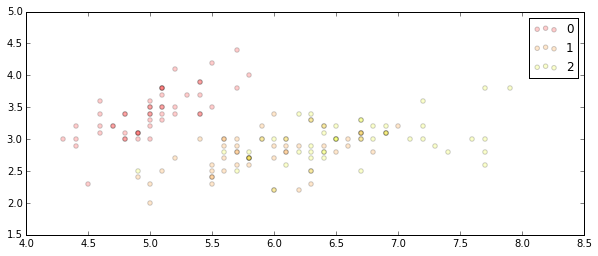

In [2]:
from sklearn import preprocessing
from sklearn import datasets
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

def graficar(x, y):
    # get the product class 
    product_class = np.unique(Y)
    colors = plt.get_cmap("hsv")
    plt.figure(figsize=(10, 4))
    for i, p in enumerate(product_class):
        mask = (y == p)
        plt.scatter(x[mask, 0], x[mask, 1], 
                    c=colors(1. * i / 11), label=p, alpha=0.2)
    plt.legend(loc="best")

iris = datasets.load_iris()
X = iris.data
Y = iris.target
print "Datos: \n", X[:10]
print "..."
graficar(X, Y)

In [ ]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
mean_ = scaler.mean_
std_ = scaler.std_
print "Mean: %s \nStd: %s" % (mean_, std_)
print "Data w/ mean removal applied (total: %d):\n %s" % (len(X_scaled), X_scaled[:10])
print "..."
graficar(X_scaled, Y)

#### b) Normalización:
#### [Teoría]:

En estadística y aplicaciones de estadística, la normalización puede tener varios significados. En los casos más simples, la normalización se refiera a el ajuste de valores medidos en diferentes escalas a una escala común, a menudo antes de trabajar con promedios.

En casos más complicados, la normalización puede referirse a ajustes más sofisticados donde la intención es "alinear" las diferentes distribuciones de probabilidad que poseen los datos.

Un enfoque distinto es la normalización cuantil, donde los cuantiles de diferentes mediciones, son llevados a una forma común.

En otro uso estadístico, el proceso de normalización se refiere a la creación de versiones escaladas y cambiadas de las estadísticas, donde la intención es que dichos valores normalizados permitan su comparación con otros valores (también normalizados), pertenecientes a otros conjuntos de datos, de modo que pueda ser posible eliminar ciertas influencias externas (por ejemplo: unidades de medida).

#### c) Scaling:
#### [Teoría]:


Típicamente, en lo referente a estadística, la acción de escalar datos tiene que ver con transformar linealmente a los valores para poder trabajar con ellos. Por ejemplo: llevando todos los valores del conjunto de datos a una escala propiamente dicha, cuyos valores esten comprendidos entre 0 y 1, o entre -1 y 1.

La normalización, en cambio, puede involucrar tanto el hecho de aplicar una transformación para que los datos estén distribuidos normalmente, o bien poner los valores en una escala común.

#### 1.1.2. Cuando trabajamos con datos de muchas dimensiones, suele ser necesario reducir esta dimensionalidad sin perder mucha información de nuestros datos, una opción para realizar esto es aplicar PCA (principal component analysis) sobre los mismos.

#### a) Aplique PCA sobre el dataset otto(ver ipynb con links a dataset)

In [8]:
from pandas import read_csv
from sklearn.decomposition import PCA


# Test dataset
test = read_csv('test.csv')

# Train dataset
train = read_csv('train.csv')
X = train.ix[:,1:-1].values
#print X
y = train.ix[:, -1]
#print y

types = np.sort(np.unique(y))
new_values = dict(zip(types, range(types.shape[0])))
y = (y.map(new_values).astype(np.int32)).values
print y
target_names = np.unique(y)

# con 18 componentes tenemos 0.6979% explicada la variablidad
# con 27 componentes tenemos 0.8006% explicada la variablidad
def get_n_comp_expl_var(variance):
    for i in range(100):
        pca = PCA(n_components=i)
        pca.fit(X)
        suma = pca.explained_variance_ratio_.sum()
        if suma >= variance:
            return i, pca

[0 0 0 ..., 8 8 8]


#### b) Cuantos componentes se deben usar para explicar la variabilidad del 70 % y 80 % de los datos.

In [18]:
variances = [0.7, 0.8]
pcas = []
for v in variances:
    res = get_n_comp_expl_var(v)
    n_comp = res[0]
    pca = res[1]
    pcas.append(pca)
    print "Para explicar el %d %% de variabilidad de los datos,\
            son necesarios %d componentes" % (v*100, n_comp)

Para explicar el 70 % de variabilidad de los datos,            son necesarios 19 componentes
Para explicar el 80 % de variabilidad de los datos,            son necesarios 27 componentes


#### c) Grafique los primeros dos PCAs

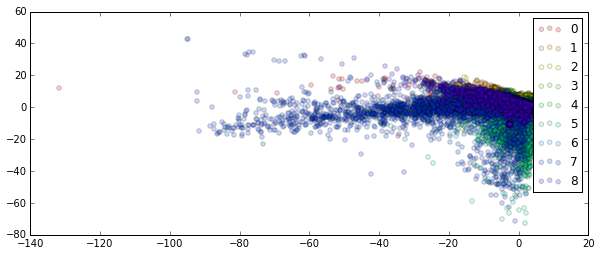

In [19]:
def graficar_pca(x_transformed, y, target_names):
    colors = plt.get_cmap("hsv")
    plt.clf()
    plt.figure(figsize=(10, 4))
    for i, p in enumerate(target_names):
        mask = (y == p)
        plt.scatter(Xp[mask, 0], Xp[mask, 1], 
                c=colors(1. * i / 11), label=p, alpha=0.2)
    plt.legend(loc="best")

for pca in pcas:
    x_transformed = pca.fit_transform(X)
    graficar_pca(x_transformed, y, target_names)

#### 1.2. Introducción a aprendizaje automático
Dentro del aprendizaje automático, contamos con varias áreas de aplicación, entre ellas podemos encontrar: clasificación, regresiones, clustering y reducción de dimensiones. 

Explique que problemas resuelven los métodos que se encuentran dentro de estas áreas, explique un método dentro de cada una de ellas y de una posible aplicación.

-------------------------------------------------------------------------------------------

Los métodos que se encuentran dentro de esas áreas resuelven los siguientes problemas:
- Clasificación: Identificar a cuál categoría pertenece un objeto.
- Regresión: Predecir un valor contínuo asociado a un objeto.
- Clustering: Agrupación automática de objetos similares en conjuntos.
- Reducción de dimensionalidad: Reducir el número de variables al azar a considerar.

#### Métodos para clasificación y regresión:
- Modelos lineales generalizados (regresión: bayesiana, logística, polinomial, entre otros).
- Modelos lineales y cuadráticos para análisis discriminante.
- Máquinas de vectores de soporte. (clasificación, regresión, formulación matemática, estimación de densidad, complejidad, entre otros).
- Stochastic Gradient Descent (Clasificación, regresión, complejidad, entre otros).
- Vecinos más cercanos (Clasificación, regresión, entre otros).
- Procesos gausseanos (Formulacion matemática, modelos de correlación, modelos de regresión).
- Descomposicion cruzada
- Naive Bayes (Gauss Naive Bayes, Multinomial Naive Bayes, Bernoulli Naive Bayes, entre otros).
- Arboles de decisión (Clasificación, regresión, problemas con múltiples resultados, complejidad, entre otros).

Aplicación: 
- Clasificacion: El uso de SVM's para determinar a que número del 0 al 9, corresponde un digito manuscrito y proporcinado como entrada.
- Regresión: Predicción del valor de una casa en función de su superficie útil, número de habitaciones, cuartos de baños, etc

#### Métodos para clustering:
- K-means
- Affinity propagation
- Mean-shift
- Spectral clustering
- Agglomerative clustering
- Entre otros

Aplicación: 
Las técnicas de agrupamiento encuentran aplicación en diversos ámbitos.
- En biología para clasificar animales y plantas.
- En medicina para identificar enfermedades.
- En marketing para identificar personas con hábitos de compras similares.
- En teoría de la señal pueden servir para eliminar ruidos.
- En biometría para identificación del locutor o de caras.

#### Métodos para reducción de dimensionalidad:
- Exact PCA and probabilistic interpretation
- Incremental PCA
- Approximate PCA
- Kernel PCA
- SparcePCA
- MiniBatchSparcePCA
- Dictionary Learning
- Factor Analysis
- Independent Component Analysis (ICA)
- Entre otros

Aplicación:

Una análisis de 11 indicadores socieconómicos de 96 países, reveló que los resultados podían explicarse en alto grado a partir de sólo dos componentes principales, el primero de ellos tenía que ver con el nivel de PIB total del país y el segundo con el índice de ruralidad.

-------------------------------------------------------------------------------------------

¿La cantidad de datos disponibles para entrenamiento pueden condicionar la elección de algún método sobre otro? ¿Y el tipo de dato? 

ver: supervisado,  no supervisado


-------------------------------------------------------------------------------------------
En la implementación, ¿Cuál es el pipe utilizado para analizar datos con una SVM? Explique parámetros y función de cada paso.

Un pipeline sencillo puede ser el siguiente:

```python
from sklearn.pipline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.predict(X_test)
```
En donde, por medio de la utilizacion de una funcion particular "make_pipeline()", se le indica con que método debe estandarizar los valores y con que algoritmo se va a trabajar, en este caso un "SVC()" (Support Vector Classifier), esto es, una SVM específica para problemas de clasificación.
Luego se le indica que entrene con un subconjunto de los datos originales y que prediga los resultados de un subconjunto de datos de prueba.

A su vez, hay pasos anteriores a esta utilización, como por ejemplo la división del conjunto de valores que se puede realizar como sigue:

```python
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```
En donde la función "train_test_split()", recibe como parámetros los datos originales (Tanto los valores originales como las clases a las que estos corresponden), el tamaño en porcentaje del conjunto de prueba resultante y el valor random_state que sirve de semilla para generar un muestreo al azar que le indica al algoritmo como hacer la división